# Linear Discriminant Analysis
### + comparison with PCA
Linear Discriminant Analysis using the LDA implementation in `scikit-learn`.
The objective with LDA is to project the data into a reduced dimension space that maximises between-class separation.  
PCA is also included for the purpose of comparison.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
%matplotlib inline

## Penguins

In [2]:
penguins_df = pd.read_csv('penguins.csv', index_col = 0)
y = penguins_df.pop('species').values
X_raw = penguins_df.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, 
                                                       random_state=1, test_size=1/2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [3]:
types = list(Counter(y).keys())
types

['Adelie', 'Gentoo', 'Chinstrap']

In [4]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_tr_lda = lda.transform(X_train)
X_tr_lda.shape

(166, 2)

In [5]:
lda.explained_variance_ratio_

array([0.84475868, 0.15524132])

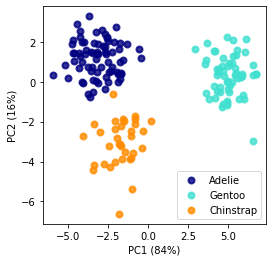

In [6]:
plt.figure(figsize=(4,4))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, target_name in zip(colors, types):
    plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1], 
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (84%)')
plt.ylabel('PC2 (16%)')
#plt.title('LDA of the Penguins dataset')

plt.show()

In [7]:
y_pred = lda.predict(X_test)
accuracy_score(y_pred,y_test)

0.9700598802395209

## PCA

In [8]:
pca = PCA(n_components=4)
X_tr_pca = pca.fit(X_train).transform(X_train)

# Proportion of variance explained for each components
pca.explained_variance_ratio_

array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

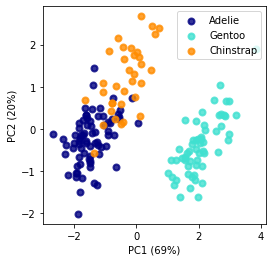

In [9]:
plt.figure(figsize=(4, 4))

lw = 2

for color, target_name in zip(colors, types):
    plt.scatter(X_tr_pca[y_train == target_name, 0], X_tr_pca[y_train == target_name, 1], 
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (69%)')
plt.ylabel('PC2 (20%)')
#plt.title('PCA of the Penguins dataset')
plt.show()